In [1]:
!pip install justext

In [0]:
import numpy as np
import nltk
import justext
import re
from nltk.tokenize import sent_tokenize
import collections

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

1.1.1

In [0]:
def top_txt(txt,top):
  most_common_words = [word for (word,f) in collections.Counter(txt).most_common(top)]
  return ''.join([word if word in most_common_words or word=='N' else '<unk>' for word in txt])
def replace_numbers(txt):
  #TODO:: Check replace numbers RegEx.
  num_format = re.compile("^[\-]?[1-9][0-9]*\.?[0-9]+$")
  return "".join([word if not re.match(num_format,word) else 'N' for word in txt])
def remove_punc(txt):
  without_punc = "".join([ c if c not in '.,:;?!@#*&%$<>' else '' for c in txt])
  return without_punc.replace("  "," ")
def tokenize(txt):
  return " ".join(nltk.word_tokenize(txt))
def segment_sents(txt):
  return "\n".join(nltk.sent_tokenize(txt))
def lower_txt(txt):
  return txt.lower()

In [0]:
def ptb_preprocess(filenames, top=10000):
  for filename in filenames:
    with open(filename) as myfile:
      

      txt_file =  myfile.read().replace('\n',' ')
      paragraphs = justext.justext(txt_file, justext.get_stoplist("English"))
      raw_text = "\n".join([p.text for p in paragraphs if not p.is_boilerplate])


      # raw_text = lower_txt(raw_text)
      # raw_text = segment_sents(raw_text)
      # print('segment_sents')
      # print(raw_text[:200])
      # raw_text = remove_punc(raw_text)
      # print('remove_punkt')
      # print(raw_text[:200])
      # raw_text = tokenize(raw_text)
      # print('tokenize')
      # print(raw_text[:200])
      # raw_text = replace_numbers(raw_text)
      # print('replace_numbers')
      # print(raw_text[:200])
      # raw_text = top_txt(raw_text,top)
      # print('top_txt')
      # print(raw_text[:200])

      raw_text = top_txt(raw_text,top)
      raw_text = replace_numbers(raw_text)
      raw_text = tokenize(raw_text)
      raw_text = segment_sents(raw_text)
      raw_text = remove_punc(raw_text)
      raw_text = lower_txt(raw_text)
      
      
      new_filename = filename+'.out'
      #print(new_filename)
      with open(new_filename, "w") as text_file:
        text_file.write(raw_text)



In [6]:
!wget https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt 

--2019-12-26 18:56:40--  https://cs.stanford.edu/people/karpathy/char-rnn/shakespeare_input.txt
Resolving cs.stanford.edu (cs.stanford.edu)... 171.64.64.64
Connecting to cs.stanford.edu (cs.stanford.edu)|171.64.64.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4573338 (4.4M) [text/plain]
Saving to: ‘shakespeare_input.txt.6’

shakespeare_input.t 100%[===================>]   4.36M  3.78MB/s    in 1.2s    

2019-12-26 18:56:42 (3.78 MB/s) - ‘shakespeare_input.txt.6’ saved [4573338/4573338]



1.1.1 Discussion: According to the descripted above if we apply the conventions of Penn Treebank, we shall give independent meaning for every word after the tokenization. Also, if we use character-level language model, we shall get another definition - morphological, because now we care about structure of the word.

1.1.2 :

In [7]:
!wget http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
!tar zxvf simple-examples.tgz

!ls simple-examples/data
!mv ./simple-examples/data ../data

--2019-12-26 18:56:44--  http://www.fit.vutbr.cz/~imikolov/rnnlm/simple-examples.tgz
Resolving www.fit.vutbr.cz (www.fit.vutbr.cz)... 147.229.9.23, 2001:67c:1220:809::93e5:917
Connecting to www.fit.vutbr.cz (www.fit.vutbr.cz)|147.229.9.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34869662 (33M) [application/x-gtar]
Saving to: ‘simple-examples.tgz.6’

simple-examples.tgz 100%[===================>]  33.25M  21.1MB/s    in 1.6s    

2019-12-26 18:56:45 (21.1 MB/s) - ‘simple-examples.tgz.6’ saved [34869662/34869662]

./
./simple-examples/
./simple-examples/data/
./simple-examples/data/ptb.test.txt
./simple-examples/data/ptb.train.txt
./simple-examples/data/ptb.valid.txt
./simple-examples/data/README
./simple-examples/data/ptb.char.train.txt
./simple-examples/data/ptb.char.test.txt
./simple-examples/data/ptb.char.valid.txt
./simple-examples/models/
./simple-examples/models/swb.ngram.model
./simple-examples/models/swb.rnn.model
./simple-examples/models/README
.

In [8]:
!ls

lg32965.zip		 shakespeare_input.txt.3  simple-examples.tgz.1
recipes_dataset		 shakespeare_input.txt.4  simple-examples.tgz.2
sample_data		 shakespeare_input.txt.5  simple-examples.tgz.3
shakespeare_input.txt	 shakespeare_input.txt.6  simple-examples.tgz.4
shakespeare_input.txt.1  simple-examples	  simple-examples.tgz.5
shakespeare_input.txt.2  simple-examples.tgz	  simple-examples.tgz.6


In [9]:
len(set(remove_punc('hello, you, hello').split()))

2

In [0]:
def num_token(txt):
  txt = txt.lower()
  return len(nltk.word_tokenize(txt))
def num_char(txt):
  return len(''.join(txt.split()))
def dist_words(txt): #vocabulary size
  txt = txt.lower()
  return len(set(remove_punc(txt).split()))
def topN_words(txt,N):
  most_common_words = ' '.join([word for (word,f) in collections.Counter(txt).most_common(N)])
  return num_tokenize(most_common_words)
def token_type_ratio(txt):
  return num_token(txt)/dist_words(txt)

def types_oov(txt_dev,txt_train): #Out Of Vocabulary 
    txt_dev = txt_dev.lower()
    text_dev_set = set(remove_punc(txt_dev).split())
    txt_train = txt_train.lower()
    text_train_set = set(remove_punc(txt_train).split())
    return len(tex_dev_set.difference(text_train_set))
def avg_sd_char_token(txt):
  total_chars = sum( [len(w) for w in nltk.word_tokenize(txt)])
  avg =  total_chars/num_token(txt)

  total_avg_chars = sum( [len(w)-avg for w in nltk.word_tokenize(txt)])
  sd =  total_chars/num_token(txt)
  return avg,sd

def dist_n_gram_words(txt,n=[2,3,4]):
  txt = txt.lower()
  txt = nltk.word_tokenize(txt)
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def dist_n_gram_chars(txt,n=range(1,8)):
  ans = {}
  for i in n:
    ans[i] = diff_grams(txt,i)
  return ans

def diff_grams(txt,n):
  s = set()
  gram = list(range(0,n))
  while gram[-1]!=len(txt):
    next_gram = tuple([txt[g] for g in gram])
    s.add(next_gram)
    gram = [g+1 for g in gram]
  return len(s)

In [11]:
# you need matplotlib version 1.4 or above
import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__version__)
%matplotlib inline
def power_law_rule(corpus):
  corpus = lower_txt(corpus)
  corpus = tokenize(corpus)
  plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
  plt.xlabel('rank')
  plt.ylabel('frequency');

3.1.2


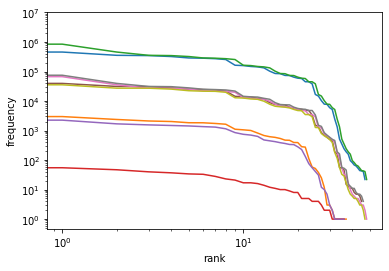

In [12]:
import os

dir = '../data'
for filename in os.listdir(dir):
  if os.path.isdir(dir+'/'+ filename):
    continue
  with open(dir+'/'+ filename,'r') as file:
      data = file.read()
      power_law_rule(data)

1.2 n-gram Word Language Model

In [0]:
#how to calculate the freq of h*w
#how to calculate the freq of w.

from collections import Counter,defaultdict
import math
from functools import reduce
from abc import ABC, abstractmethod

class LangModell:
  @abstractmethod
  def predict_next_word(self,prev_words):
    pass
  @abstractmethod
  def evaluate_next_word(self,prev_word):
    pass
  
class n_gram_model(LangModell):
  def __init__(self,gamma=0):
    self.outlm = {}
    self.freq_words = collections.Counter()
    self.gamma = gamma

  def train_model(self, dataset,n,pre_process,tokenize=True):
    lm = defaultdict(Counter)
    if pre_process == True :
      ptb_preprocess([dataset])
    filename =  dataset if pre_process == False else dataset+'.out'
    with open(filename) as file:
      data = file.read()
      if tokenize:
        data = nltk.word_tokenize(data)
    self.freq_words = collections.Counter(data)
    n = n-1
    if tokenize:
      pad = ["~"] * n
    else:
      pad = '~' * n
    data = pad + data
    for i in range(len(data)-n):
        history, word = tuple(data[i:i+n]), data[i+n]
        lm[history][word]+=1

    def normalize(counter):

       #(c+gamma)/(N+B*gamma) according to the lidstone estimator from the NLTK docs.
      
        N = float(sum(counter.values()))
        B = len(counter)
        return { word : c+self.gamma/(N+B*self.gamma) for word,c in counter.items()}

    self.freq_words= {word:freq/len(data) for word,freq in self.freq_words.items()}
    self.not_normalized_lm = lm
    self.outlm = {hist:normalize(cntr) for hist, cntr in lm.items()}

  def predict_next_word(self, prev_words,chars=False):
    if chars:
      possible_words = self.outln(tuple(prev_words))
    else:
      possible_words =  self.outlm[tuple(nltk.word_tokenize(prev_words.lower()))]
    next_word, prob = max(possible_words.items(), key=lambda x:x[1])
    return next_word,prob

  def evaluate_next_word(self, prev_words,next_word):
    prev_words = tuple(nltk.word_tokenize(prev_words.lower()))
    if prev_words in self.outlm:
      counter = self.not_normalized_lm[prev_words]
      N = float(sum(counter.values()))
      B = len(counter)
      c = self.not_normalized_lm[prev_words][next_word]
      return (c+self.gamma)/(N+B*self.gamma) 
    return 0

def perplexity(model,test_filename,pre_process=True,n=2):
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename=test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  answer = 1
  #print("Number of tested tokens :", len(data))
  for i in range(len(data) - (n+1)):
    prev_words = ' '.join(data[i:i+n-1])
    next_word = data[i+n-1]
    eval = model.evaluate_next_word(prev_words,next_word)
    #print(eval)
    if eval!=0:
      eval = (1/eval) **(1/len(data))
      answer*= eval
  return answer  

def cross_entropy(model,test_filename,pre_process=True):
  #TODO: validate how to calculate it
  if pre_process == True:
    ptb_preprocess([test_filename])
    filename = test_filename+'.out'
  else:
    filename = test_filename
  with open(filename) as file:
    data = nltk.word_tokenize(file.read())
  return sum( [math.log(model.freq_words[word],2)/len(data) for word in data] )

def train_word_gen(dataset,n=2,gamma=0):
  lm = n_gram_model(gamma=gamma)
  lm.train_model(dataset,n,False)
  return lm

def train_word_lm(dataset,n=2,tokenize=True):
  lm = n_gram_model()
  lm.train_model(dataset,n,False,tokenize=tokenize)
  return lm

In [14]:
#Example:
lm = train_word_lm('../data/ptb.train.txt')
lm.predict_next_word('Not')

('to', 117.0)

*1.2.2 How much memory do you expect a model to occupy? Refer to the statistics results above and provide worst-case estimates as well as expected.*

**Answer:** For each bigram in the text, we a list of tuples - each the size of 2 (bigram) and a word after it.
We can compute with the statistics the total number of distinct bigrams and multiply it by total number of distinct words in the corpus - that will be the worst case.

In [15]:
with open('../data/ptb.train.txt','r') as file:
  data = file.read()
  print(dist_words(data))
  print(dist_n_gram_words(data,n=[2]))



9941
{2: 277419}


In [16]:
perplexity(lm,'../data/ptb.test.txt',False)

16.545459326639662

In [17]:
cross_entropy(lm,'../data/ptb.test.txt',False)

-9.063709298744856

##1.3.1

Text(0, 0.5, 'PERPLEXITY')

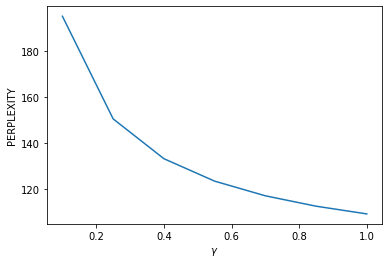

In [18]:

gamma_values = np.linspace(0.1,1,num=7)
perplexity_values = []
for gamma in gamma_values:
  lm = train_word_gen('../data/ptb.train.txt',gamma=gamma)
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt')]

plt.plot(gamma_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('$\gamma$')
plt.ylabel('PERPLEXITY')

109.09225296489092
1.4732221154037362
1.0219284781911773
1.0041402175981577
1.0015080066888122
1.0001703209355337
1
1
1


Text(0, 0.5, 'PERPLEXITY')

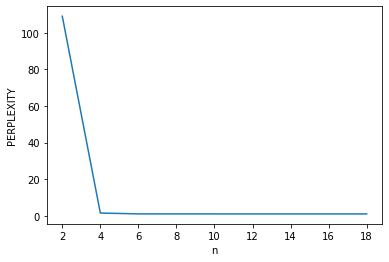

In [19]:
best_gamma = 1 #according to the plot above

n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  lm = train_word_gen('../data/ptb.train.txt',n=n,gamma=best_gamma)
  print (perplexity(lm,'../data/ptb.valid.txt',n=n))
  perplexity_values += [perplexity(lm,'../data/ptb.valid.txt',n=n)]

plt.plot(n_values,perplexity_values)
#plt.loglog([val for word,val in collections.Counter(corpus).most_common(4000)])
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [20]:
best_n = 3
best_gamma =1

lm = train_word_gen('../data/ptb.train.txt',n=best_n,gamma=best_gamma)
print(perplexity(lm,'../data/ptb.test.txt',n=best_n))



6.202578534555306


#TODO: for Nitzan
1. Check what happens when for P(a|b) b=0 and specifically for our ngrams model
2. Check with others about the perplexity when n>2
3. compare perplexity graph accoridng to gamma

1.3.2 Generating text

Another way to evaluate a language model is to use the model in a generative manner - that is, to randomly sample sentences starting from a seed prefix, and generating each next word by sampling from the model distribution p(w | prefix).

Discuss ways to generate when the seed is shorter than the history length of the n-gram model. Discuss ways to decide when the generation should stop. In this question, when you sample from the LM given a history, pick the most likely word generated by the LM. Report at least 5 randomly generated segments on different seeds and comment on what you observe.

In [0]:
def generate(model,seed):
  p = 0
  output = seed
  while True:
    next_word, prob = model.predict_next_word(seed)
    output = ' '+ next_word
    p+= prob
    if p>=1:
      break
  return output

##1.4

In [22]:
#download the dataset
!wget http://www.ffts.com/recipes/lg/lg32965.zip
!unzip lg32965 -d recipes_dataset
!rm lg32965.zip
!ls

--2019-12-26 18:59:47--  http://www.ffts.com/recipes/lg/lg32965.zip
Resolving www.ffts.com (www.ffts.com)... 66.96.149.1
Connecting to www.ffts.com (www.ffts.com)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11805248 (11M) [application/zip]
Saving to: ‘lg32965.zip.1’

lg32965.zip.1       100%[===================>]  11.26M  13.9MB/s    in 0.8s    

2019-12-26 18:59:48 (13.9 MB/s) - ‘lg32965.zip.1’ saved [11805248/11805248]

Archive:  lg32965.zip
replace recipes_dataset/11000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recipes_dataset/11000.mmf  
replace recipes_dataset/13000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recipes_dataset/13000.mmf  
replace recipes_dataset/15000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: recipes_dataset/15000.mmf  
replace recipes_dataset/17000.mmf? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: recipes_dataset/17000.mmf  
  inflating: recipes_dataset/19000.mmf  
  infl

In [23]:
#prepare dataset
with open('recipes_dataset/32965.mmf',errors='ignore') as file:
  recipes=[]
  collector = []
  for line in file:
    line = str(line).replace('MMMMM','')#.replace('\n','')
    if 'Recipe via Meal-Master (tm) v8.05' in line:
      recipes += [''.join(collector)]
      collector = []
    else:
      collector += [line]
  recipes += [''.join(collector)]
  recipes = recipes[1:]

#print statistics
total_recipes = ''.join(recipes)
print('number of recipes',len(recipes))
print('number of tokens',num_token(total_recipes))
print('number of characters',num_char(total_recipes))
print('vocabulary size',dist_words(total_recipes))
print('avg word count',float(np.mean([num_token(rec) for rec in recipes])))
print('avg word length')


number of recipes 965
number of tokens 201821
number of characters 783933
vocabulary size 10676
avg word count 209.1740932642487
avg word length


In [0]:
class MyDataLoader():

  def __init__(self,dataset):
    from math import floor,ceil

    self.train_data = dataset[0:floor(0.8*len(dataset))]
    self.valid_data = dataset[ceil(0.8*len(dataset)):floor(-0.1*len(dataset))]
    self.test_data = dataset[ceil(-0.1*len(dataset)):]

In [0]:
dataloader = MyDataLoader(recipes)
joined_recipes_train = ''.join(dataloader.train_data)
joined_recipes_test = ''.join(dataloader.test_data)
joined_recipes_val = ''.join(dataloader.valid_data)

# with open('tmp_train.txt', "w") as text_file:
#   text_file.write(joined_recipes_train)
# with open('tmp_test.txt', "w") as text_file:
#   text_file.write(joined_recipes_test)

#using Ben Eyal's implementation for chars lang. model


def create_lm(data, n=5):
    pad = '$' * (n-1)
    data = pad + data
    cfd = nltk.ConditionalFreqDist((data[i : i + n-1], data[i + n-1]) for i in range(len(data) - (n-1)))
    cpd = nltk.ConditionalProbDist(cfd, nltk.MLEProbDist)
    return cpd

def chars_generate(lm,n,num_chars):
  import string
  import random

  out = []
  hist = '$' * (n-1)
  for _ in range(num_chars):
      try:
        #print(hist)
        #print(lm[hist])
        letter = lm[hist].generate()
      except:
        break
      hist = hist[1:] + letter
      out.append(letter)
  print(''.join(out))

def chars_perplexity(lm,data,n):
  answer = 1
  for i in range(len(data) - (n+1)):
      prev_chars = data[i:i+n-1]
      next_char= data[i+n-1]
      eval = lm[prev_chars].prob(next_char)
      if eval==0:
        eval = 1/(128) #ascii (smoothing)
      if eval!=0:
        eval = (1/(eval)) **(1/len(data))
        answer*= eval
  return answer  




Text(0, 0.5, 'PERPLEXITY')

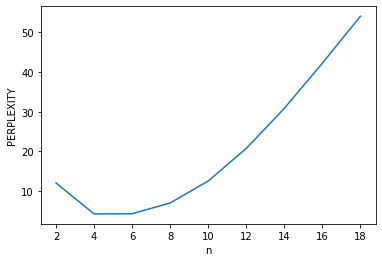

In [26]:
n_values = list(range(2,20,2))
perplexity_values = []
for n in n_values:
  lm = create_lm(joined_recipes_train,n=n)
  perplexity_values += [chars_perplexity(lm,joined_recipes_val,n=n)]

plt.plot(n_values,perplexity_values)
plt.xlabel('n')
plt.ylabel('PERPLEXITY')

In [27]:
best_n = 6 #according to the graph

lm = create_lm(joined_recipes_train, n=best_n)
num_chars = int(np.mean([num_char(rec) for rec in dataloader.test_data]))
chars_generate(lm,best_n,num_chars)

 
     2 tb Onion, may have used in warm. Drain off fat in heavy cream
 
  Place on wire rack, garlic in rice diced
     Garlic and rosemary. Arange juice. Add green
     1 c  While stirring or milk, sugar
  1 1/2 c  Saute' 1 minutes.
  
  Refrigerated)
       2 c  Celery seeded
            Title: JIM BOWL. BEAT butter cold seconds, or until mushrooms, basil,
  fry on the and remaining zucchini is melt 2 tables, Main dish. Servings
 
    10 oz Tomatoe pasta, Beef Cube cheese - parmesan cheese
 
            Breads, Quick Mix" tri-fold oven. Add tomatoes, dry shell
  foam sugar, egg,
  sugar. Preheat oil
  though the pear in a cooking. Slowly additions. Over to a boil and servings
 
     Yield: 2 Serve slices in Jiffy Butter
    WALT RISING THE SHRIMP
        1 c  Milk
 
  1) Press the bay leaf bastina-heat. Breads gave meat dough into a rack. With parsley, salt, sugar, chives and currants.  Cover zucchini has set, instantial.
        -mixture.
  Knead it make dough i


In [28]:
chars_generate(lm,best_n,num_chars)

 
     -minced
       Yield: 4 Servings
 
----------------------------------
      2 lb Ground beef drip
  and strain rind insert Shared by Elizabeth Baird: "A Blend well. Sprinkle
  with freshly ground turkey melted with grease the salads, Quick come of the ingredients and add the cheese
       4    Eggs
                Celery and hands into the manufacture and egg, finely Choices, hold
  more vinegar
    1    Make uncooked rimmed
    1/4 c  Milk
     2 tb Chickens. Spoon and cook one edging the meat from a floured by:
  Cover salad or sprinkle with bake 2 1/2 ts Dried, cut in
  per servings
 
----------------------JALEBIS------
     1 c  Spaghetti or maker
      2    green beans; drain.Makes a boiling,
  color
  absorbed.
  
  Hazelnut Markets. Strawberry jello
       1/4 ts Ginger if need throughly on top will keep a light. Next to sticks of smoke at all
  filing the other sauce;
      To 3 3/4 c  Bread soup with
          1/2 ts Cook 10 minutes.
  
  Place to sk


In [29]:
chars_generate(lm,best_n,num_chars)

 
       3/4 c  Whole to thing thumb and vinegar
    1/2 teaspoons of the dough.  Knead the pot, punch dough. Place the been sour cream. Cover meat **
     Yield: 4 Serve whites
  and tomato salt
  2 1/2 ts Instantly. Keep in gummy firm frequently to
  chicken stock)
     1    Rump roasted by Stephen Ceideburg 2
  cup
          Yield: 1 10" to 10 min or
    1    Grated Fat...Trace Provalone Cherry or to
       10 dr Green pepper and
  rack of tomato.
        Yield: 6 Servings--except 1/4 c  Milk
      6 c  Flour
           Yield: 5 Serve in shallow rice and top of
  make than 1-inch & arranges.
  
  Rinse ricotta cheese (sorry, Cognac or cheeses.
  
  Drain
  the jar for
            Title: ITALIAN HERB DRESSING TRAY. BAKE
 Categories: Breads, Ethnic
      - uncovered, 1/2 ts Pepper, try is exotic continue until you can use into bring up to 50 minutes, the refrigerate the dried the directions; cut each leaves simmer, stick buttermilk.  Mix well amount of the lemon ju


In [30]:
chars_generate(lm,best_n,num_chars)

 
          1 md Boil & heat to avoid burner Inn, Sandy Main dish with butter, but, after each adding them completely into 1-inch loaf. 10.  Definitely). Rub
  the recipe dough to a bowl mixture to cool combine remaining powder,
  fold overnight.
   What in refreezer 10 to 15 minutes, then covered Sugar
  1 1/2 tb Brown sugar
       Yield: 6 Serving effect.
  
  I tried oregano
      1/2 ts Nutmeg
  2 1/2 c  Sugar
    1/4 c  Whole Alaska Seafoo, Fish sauce, green peppercornstarch
     Title: JAMBALAYA I
 Categories: Appetizers, cut out onions and shaving pa= n, and crumbs,dressing to escarole
  bowl compiled potatoes--lettuce.
  
  Mix all ingredients
              Yield: 1 Serving-- canning so you add browns Johnsonian.
  
      (12 ounces sounds with to full recipe By        Yield: 16 Servings
 
      2 c  Mayonaise. Discard and diced dried basil
    Fresh crushed
     1/4 c  Red apricots,
  cabbage; cut in large heat eggplant
  dish at a time, beaten well. Season


###Observations
We can see that the LM's dist. can 'understand' the structure of recipes. That is, understand a syntax similar to [amount] [unit] [ingredient] [activity]* 

We also observe that some ingredient typically occure in the beginning, such as Oregano, we have no idea why it happens.

The model doesn't do indendation like the dataset. It doesn't finish some sentences.

Although the model is for characters, we can see that it's not completely gibberish, there are many real English words that appear semantically in the vocabullary of recipes, as we expected.


#Part 2

In [0]:
import matplotlib.pyplot as plt
import matplotlib
import math
import numpy as np
import scipy.linalg

In [0]:
def generateDataset(N, f, sigma):
  mu = 0.0
  vf = np.vectorize(f)
  x = np.linspace(0,1,num=N)
  noise = np.random.normal(loc=mu,scale=sigma,size=N)
  t = vf(x) + noise
  return (x,t)

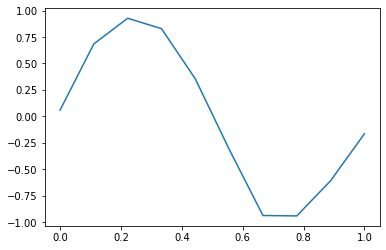

In [33]:
#sanity check
f = lambda x : math.sin(math.pi * 2 * x)
plt.plot(*generateDataset(10,f,0.1))

In [0]:
def OptimizeLS(x, t, M):                      
  phi = np.vander(x,M+1,True)
  prod = np.dot(phi.T, phi)             
  i = np.linalg.inv(prod)
  m = np.dot(i, phi.T)
  w = np.dot(m, t)
  return w                                                              

In [35]:
np.vander([1,2,3,4],3,True)

array([[ 1,  1,  1],
       [ 1,  2,  4],
       [ 1,  3,  9],
       [ 1,  4, 16]])

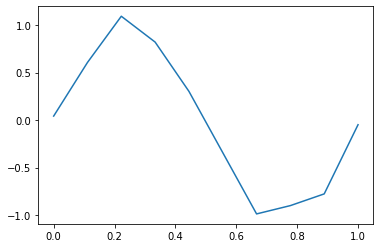

In [36]:
(x,t) = generateDataset(10,f,0.1)
plt.plot(x,t)

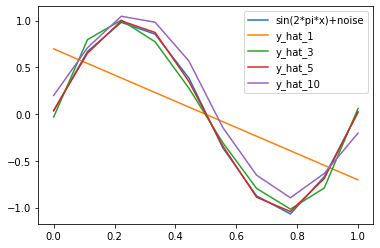

In [37]:
N = 10
get_y = lambda w,M: lambda x: sum([w[i]*(x**i) for i in range(M+1)])
(x,t) = generateDataset(N,f,0.03)
plt.plot(x,t)
for M in [1,3,5,10]:
  w = OptimizeLS(x,t,M)
  y_hat = np.vectorize(get_y(w,M))
  plt.plot(x,y_hat(x))
plt.legend(['sin(2*pi*x)+noise','y_hat_1','y_hat_3','y_hat_5','y_hat_10'])

##2.4

In [0]:
def generateDataset3(N,f,sigma):
  from math import ceil,floor
  mu = 0.0
  vf = np.vectorize(f)
  x = np.linspace(0,1,num=N*3)

  noise = np.random.normal(loc=mu,scale=sigma,size=N*3)
  t = vf(x) + noise
  pairs = list(zip(x,t))
  #print(list(zip(x,t)))
  np.random.shuffle(pairs)
  #print(pairs)
  def sort_by_x(lst):
    return sorted(lst,key=lambda x : x[0])
  train = sort_by_x(pairs[0:N])
  valid = sort_by_x(pairs[N:2*N])
  test = sort_by_x(pairs[2*N:])
  return train,valid,test

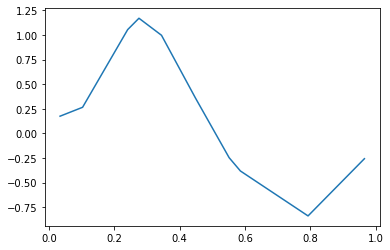

In [39]:
a,b,c = generateDataset3(10,f,0.1)
a_x = [x for x,_ in a]
a_y = [y for _,y in a]
plt.plot(a_x,a_y)

In [0]:
def optimizePLS(x, t, M, _lambda):
  phi = np.vander(x,M+1,True)
  prod = np.dot(phi.T, phi)
  lambda_mat = np.eye(M+1)*_lambda + prod
  i = np.linalg.inv(lambda_mat)
  m = np.dot(i, phi.T)
  w = np.dot(m, t)
  return w   

In [0]:
def optimizePLS2(xt, tt, xv, tv, M):
  N = len(xt)
  min_error  = [1,1,float("inf")]
  for log_lambda in range(-40,-20):
    w = optimizePLS(xt,tt,M,2**log_lambda)
    error = calculate_error(w,xv,tv)
    if error<min_error[2]:
      min_error = [2**log_lambda,w,error]
  print('chosen lambda',min_error[0])
  return min_error[0],w

In [0]:
def calculate_error(w,x,y):
  poly = np.vectorize(get_y(w,M))
  poly = poly(x)
  power2 = lambda x : x**2
  error = (1/N)*(sum(power2(y - poly)))**(1/2)
  return error

chosen lambda 4.656612873077393e-10
chosen lambda 1.1920928955078125e-07


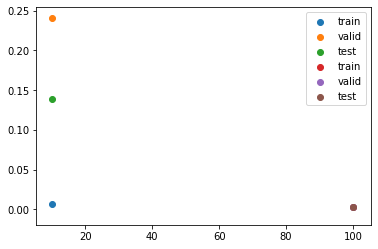

In [43]:
for N in [10,100]:
  (train,val,test) = generateDataset3(N,f,0.03)
  xt = [x for x,_ in train]
  tt = [x for _,x in train]
  xv = [x for x,_ in val]
  tv = [x for _,x in val]
  xtest = [x for x,_ in test]
  ttest = [x for _,x in test]
  M = N - 1
  _,w = optimizePLS2(xt,tt,xv,tv,M)
  plt.scatter(N,calculate_error(w,xt,tt))
  plt.scatter(N,calculate_error(w,xv,tv))
  plt.scatter(N,calculate_error(w,xtest,ttest))
plt.legend(['train','valid','test','train','valid','test'])

##2.4

In [0]:
import numpy as np


def bayesianEst(x,t,M,alpha,sigma2):
  def phi(x):
    return np.array([x**i for i in range(M+1)]).reshape((M+1),1)
  N = len(x)
  # collect_vectors = [phi(xi) for xi in x]

  # phi_mat = np.array(collect_vectors).T

  phi_sum = np.zeros((M+1,M+1))
  for n in range (N):
    phi_sum  += np.multiply(phi(x[n]),(phi(x[n]).T))
  S_inv = alpha*np.identity(M+1) + np.dot((1/sigma2),phi_sum)
  phi_mat = np.vander(x,M+1,True)
  S = np.linalg.inv(S_inv)
  def mean(xi):
    sumX = np.array([0]*(M+1))
    for n in range(N):
      a = np.dot(phi_mat[n], t[n])
      sumX = np.add(sumX,a)
    return (1/sigma2)*(phi(xi).T)@S@sumX
  
  def variance(x):
    return sigma2 + (phi(x).T)@S@phi(x)

  return (mean,variance)

Text(0.5, 1.0, 'Bayesian Estimation')

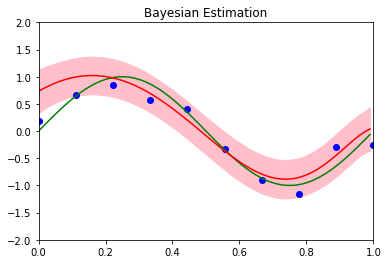

In [195]:
x, t = generateDataset(N=10,f=lambda x: math.sin(2*np.pi*x),sigma=math.sqrt(1/11.1))
m,v = bayesianEst(x,y_train,9,0.005,1/11.1)

x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)


m = np.vectorize(m)
v = np.vectorize(v)
mean = m(x_real)
#mean = [m(t) for t in x_real]
variance = v(x_real)
#variance = [v(t) for t in x_real]

SD = np.sqrt(variance)
upper = mean + SD
lower = mean - SD



plt.plot(x, t, 'bo')
plt.plot(x_real, y_real, 'g-')
plt.plot(x_real, mean, 'r-')
plt.fill_between(x_real, upper, lower, color='pink')
plt.xlim(0.0, 1.0)
plt.ylim(-2, 2)
plt.title('Bayesian Estimation')

m,v = bayesianEst([1,2,3],[1,2,3],2,0,0.1)

1.   List item
2.   List item


v(1)

In [0]:
def bayesianEstimator(x, t, M, alpha, sigma2):
  t_vec = np.asarray(t).T
  N = len(x)
  print(t_vec.shape)
  phi = np.vander(x,M+1,True)
  #print(phi)
  phi_ = lambda x : np.array([x**i for i in range(M+1)]).T
  S_inv = alpha*np.eye(M+1) + (1/sigma2)*np.dot(phi.T,phi)
  S = np.linalg.inv(S_inv)
  def m(x):
    a = (1/sigma2)*phi_(x).T
    print(a)
    print(phi[:,0:N].shape)
    b = phi[:,0:N]@t_vec
    return a@S@b

  #m = lambda x : (1/sigma2)*(phi_(x).T@S@ phi[1:N,:]@t_vec)
  s2 = lambda x : sigma2 + phi_(x).T@S@phi_(x)
  return (m,s2)
  

In [47]:
h = list(range(100))
m,var = bayesianEstimator(h,h,2,0.1,0.1)

(100,)


In [48]:
m(1)

[10. 10. 10.]
(100, 3)


ValueError: ignored

In [0]:
var(1)